In [1]:
import numpy as np
X = 2 * np.random.rand(100, 1) #All of our instances (one feature )
y = 4 + 3 * X + np.random.rand(100,1) #our labels


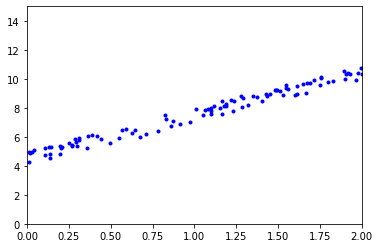

In [2]:
from matplotlib import pyplot as plt
plt.plot(X, y, "b." ) 
plt.axis([0,2,0,15])
plt.show()


In [3]:
X_b = np.c_[np.ones((100,1)), X] #add x0 = 1 to each instance, this is our bias
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best #parameters that better fit for our linear model


array([[4.6434725 ],
       [2.92773764]])

In [4]:
#Let's do some predictions with our parameters
X_new = np.array([[0], [2]]) #New instances
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict 

array([[ 4.6434725 ],
       [10.49894779]])

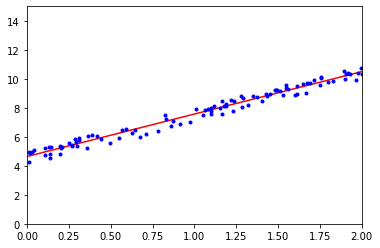

In [5]:
#Let's plot the model's predictions
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [6]:
#Now let's use scikit learn to preform a linear regression model
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)
linear_regressor.coef_, linear_regressor.intercept_
linear_regressor.predict(X_new)

array([[ 4.6434725 ],
       [10.49894779]])

In [7]:

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond= 1e-6)
theta_best_svd 

array([[4.6434725 ],
       [2.92773764]])

In [8]:
np.linalg.pinv(X_b).dot(y)
np.linalg.svd(X_b)

(array([[-1.03110114e-01,  6.94194441e-03, -1.09651678e-01, ...,
         -1.05189180e-01, -9.45931606e-02, -9.57151357e-02],
        [-1.32988502e-01, -8.25319852e-02,  1.36002038e-01, ...,
          6.89176422e-02, -9.03715184e-02, -7.35049516e-02],
        [-4.93673044e-02,  1.67880360e-01,  9.70973810e-01, ...,
         -1.98090204e-02,  2.07677192e-03, -2.40637349e-04],
        ...,
        [-7.07441447e-02,  1.03865196e-01, -2.02147020e-02, ...,
          9.84928435e-01, -2.85939554e-03, -4.15249902e-03],
        [-1.21502580e-01, -4.81361995e-02,  7.07815798e-04, ...,
         -3.82267002e-03,  9.85419876e-01, -1.34410549e-02],
        [-1.16127948e-01, -3.20413085e-02, -1.50759574e-03, ...,
         -5.01377578e-03, -1.33390572e-02,  9.87542477e-01]]),
 array([14.96674532,  4.09468366]),
 array([[-0.63374649, -0.77354081],
        [ 0.77354081, -0.63374649]]))

# **Batch Gradient Descent ** 

In [9]:
eta = 0.1 #Learning rate
n_iterations = 1000
m = 100 #Number of instances
X_b #Train set (with the bias parameter (x0 = 1))
 
thetas = np.random.rand(2,1) #Random values for thetas

for iterations in range(n_iterations):
  gradients = 2 /m * X_b.T.dot(X_b.dot(thetas) - y) #compute gradient vector
  thetas = thetas - eta*gradients #compute the new thetas

thetas

array([[4.6434725 ],
       [2.92773764]])

# *Stochastic Gradient Descent *


In [15]:
n_epochs = 50
t0, t1 = 5,50 #learning schedule hyperparameters

def learning_schedule(t):
  return t0/ (t+t1)

thetas - np.random.rand(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    random_idx = np.random.randint(m)
    xi = X_b[random_idx:random_idx + 1]
    yi = y[random_idx:random_idx + 1]

    gradients = 2* xi.T.dot(xi.dot(thetas) - yi)
    eta = learning_schedule(n_epochs * m + i )
    thetas = thetas - eta * gradients

#Using Sklearn
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.63511701]), array([2.9538454]))